# Chapter 2: Natural Language and Distibuted Representations

## 2.1. Natural Language Processing

## 2.2 Thesaurus

Thesaurus is a list of words and their synonyms.
It has been created by the [wordnet](https://wordnet.princeton.edu/) project.
But there are problems in using thesaurus for natural language processing because it need a lot of work to keep updating according to word meaning change and new word is added.

## 2.3 Count base method

Text data acuired for the purpose of understanding natural language is called 'corpus'.



In [24]:
# use corpus

text = 'You say goodbye and I say hello.'
text = text.lower()
text = text.replace('.', ' .')

words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [34]:
import numpy as np

def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}

    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    
    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(word_to_id)
print(id_to_word)


[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


### 2.3.2 Distributed Representations

Vector expression of words to cacth the "meaning of word" is called 'distributed representations'.

### 2.3.3 Ditsributional hypothesis

The ida of distributional hypothesis is that the meaning of a word is formed by the words that surround it.

### 2.3.4 Co-occurence matrix

Focus on a particular word, count the words that appear aroiund it, and tally them up.

For text `'you say goodbye and i say hello.'`, only 'say' appears around 'I', but if focus on 'say', the 'goodbye' and 'hello' are counted.
This can be shown in following table.

| | you | say | goodbye | and | i | hello | . |
| --- | --- | --- | --- | --- | --- | --- | --- |
| you | 0 | 1 | 0 | 0 | 0 | 0 | 0 |
| say | 1 | 0 | 1 | 0 | 1 | 1 | 0 |
| goodbye | 0 | 1 | 0 | 1 | 0 | 0 | 0 |
| and | 0 | 0 | 1 | 0 | 1 | 0 | 0 |
| i | 0 | 1 | 0 | 1 | 0 | 0 | 0 |
| hello | 0 | 1 | 0 | 0 | 0 | 0 | 1 |
| . | 0 | 0 | 0 | 0 | 0 | 1 | 0 |

In [40]:
import sys
# sys.path.append("../.org/deep-learning-from-scratch-2/")
import numpy as np

C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0],
], dtype=np.int32)

print(C[word_to_id['goodbye']])


def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

print(C)

[0 1 0 1 0 0 0]
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


In [36]:
test = enumerate(corpus)
print(test)

### 2.3.5 Similarity of word vectors

$$
    similarity(x,y) = \frac{x\cdot y}{\|x\|\|y\|} =\frac{x_1 y_1 + \cdots + x_n y_n}{\sqrt{x_1^2 + \cdots + x_n^2} \sqrt{y_1^2 + \cdots + y_n^2}}
$$

In [30]:
def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x**2)) + eps)
    ny = y / (np.sqrt(np.sum(y**2)) + eps)
    return np.dot(nx, ny)

def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):

    if query not in word_to_id:
        print('%s is not found' % query)
        return
    
    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            break

In [29]:
import sys
sys.path.append("../.org/deep-learning-from-scratch-2/")
import numpy as np
# from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
cos_similarity(c0, c1)



0.7071067691154799

In [32]:
import sys
sys.path.append("../.org/deep-learning-from-scratch-2/")
import numpy as np
#from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
most_similar('goodbye', word_to_id, id_to_word, C, top=5)




[query] goodbye
 i: 0.9999999858578643
 you: 0.7071067691154799
 hello: 0.49999999292893216
 say: 0.0
 and: 0.0


## 2.4 Improwing count based method

Count base method tend to show high similarity for the word which appear more frequently.
To solving this, there is a method to use Pointwise Mutual Information(PMI) which is used to calculate the similarity of two words and appearance ratio.

PMI is calculated as follows.

$$
    PMI(x,y) = \log _2\frac{p(x,y)}{p(x)p(y)}
$$

When both value x and y are zero, PMI is set as -infinity.
PPMI is used to reduce the effect of zero values(minus value is translated to zero).


In [33]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% done' % (100*cnt/total))

    return M


In [42]:
import numpy as np

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)
print('Co-occurence matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)
print(W.shape)

Co-occurence matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]
(7, 7)


### 2.4.2 Dimensionality reduction

Problem of PPMI is that it is a sparse matrix.
To solve this problem, Dimentionality reduction like Singluar Value Decomposition(SVD) is used.

$$
    X = U S V^T
$$

### 2.4.3 Dimensionality reduction by SVD

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]
[[-3.409e-01 -1.110e-16 -4.441e-16  1.205e-01  9.323e-01  0.000e+00
   3.207e-16]
 [ 0.000e+00 -5.976e-01  1.802e-01  0.000e+00  0.000e+00 -7.812e-01
   0.000e+00]
 [-4.363e-01 -5.551e-17 -2.220e-16  5.088e-01 -2.253e-01 -1.388e-17
  -7.071e-01]
 [-3.579e-16 -4.978e-01  6.804e-01  1.240e-16  8.184e-17  5.378e-01
  -8.846e-17]
 [-4.363e-01 -4.329e-17 -2.217e-16  5.088e-01 -2.253e-01 -1.804e-17
   7.071e-01]
 [-7.092e-01 -4.329e-17 -2.217e-16 -6.839e-01 -1.710e-01 -1.804e-17
  -1.048e-16]
 [ 4.899e-16 -6.285e-01 -7.103e-01 -1.706e-16 -2.240e-16  3.169e-01
   1

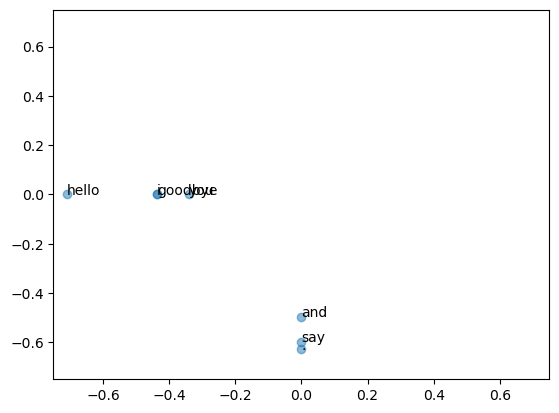

In [45]:
import numpy as np
import matplotlib.pyplot as plt

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

print(C)
print(W)
print(U)
print(S)
#print(V)

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.xlim(-0.75, 0.75)
plt.ylim(-0.75, 0.75)
plt.show()

### 2.4.4 PTB Data set


In [46]:
import sys
sys.path.append("../.org/deep-learning-from-scratch-2/")
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('corpus size:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print('word_to_id["car"]:', word_to_id['car'])
print('word_to_id["happy"]:', word_to_id['happy'])
print('word_to_id["lexus"]:', word_to_id['lexus'])


Done
corpus size: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id["car"]: 3856
word_to_id["happy"]: 4428
word_to_id["lexus"]: 7426


### 2.4.5 Evaluation of PTB Dataset


In [47]:
import sys
sys.path.append("../.org/deep-learning-from-scratch-2/")
import numpy as np
# from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('counting co-occurences ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('calculating PPMI ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    # truncated SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)

except ImportError:
    # SVD
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)



counting co-occurences ...
calculating PPMI ...
1.0% done
2.0% done
3.0% done
4.0% done
5.0% done
6.0% done
7.0% done
8.0% done
9.0% done
10.0% done
11.0% done
12.0% done
13.0% done
14.0% done
15.0% done
16.0% done
17.0% done
18.0% done
19.0% done
20.0% done
21.0% done
22.0% done
23.0% done
24.0% done
25.0% done
26.0% done
27.0% done
28.0% done
29.0% done
30.0% done
31.0% done
32.0% done
33.0% done
34.0% done
35.0% done
36.0% done
37.0% done
38.0% done
39.0% done
40.0% done
41.0% done
42.0% done
43.0% done
44.0% done
45.0% done
46.0% done
47.0% done
48.0% done
49.0% done
50.0% done
51.0% done
52.0% done
53.0% done
54.0% done
55.0% done
56.0% done
57.0% done
58.0% done
59.0% done
60.0% done
61.0% done
62.0% done
63.0% done
64.0% done
65.0% done
66.0% done
67.0% done
68.0% done
69.0% done
70.0% done
71.0% done
72.0% done
73.0% done
74.0% done
75.0% done
76.0% done
77.0% done
78.0% done
79.0% done
80.0% done
81.0% done
82.0% done
83.0% done
84.0% done
85.0% done
86.0% done
87.0% done
88.0

# Appendix B: WordNet

## B.1 Install NLTK

`pip install nltk`


In [1]:
import nltk

## B.2 Get synonyms

In [5]:
from nltk.corpus import wordnet

nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
from nltk.corpus import wordnet

wordnet.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [15]:
car = wordnet.synset('car.n.01')
print(car.definition())
print(car.lemma_names())

a motor vehicle with four wheels; usually propelled by an internal combustion engine
['car', 'auto', 'automobile', 'machine', 'motorcar']


## B.3 WordNet and terms network



In [16]:
car.hypernym_paths()[0]

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('artifact.n.01'),
 Synset('instrumentality.n.03'),
 Synset('container.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('car.n.01')]

## B.4 Semantic similarity according to WordNet

Similarity can be measured by using `path_similarity` or `wup_similarity`.


In [17]:
car = wordnet.synset('car.n.01')
novel = wordnet.synset('novel.n.01')
dog = wordnet.synset('dog.n.01')
motorcycle = wordnet.synset('motorcycle.n.01')

print(car.path_similarity(novel))
print(car.path_similarity(dog))
print(car.path_similarity(motorcycle))

0.05555555555555555
0.07692307692307693
0.3333333333333333
